In [439]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report

In [440]:
df=pd.read_csv('E:/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## cleaning the data

In [441]:
data=df.drop('customerID',axis=1)

In [442]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [443]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [444]:
data.select_dtypes('object').describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [445]:
data['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [446]:
#convert column "Total charges" to numeric
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [447]:
# find null value
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [448]:
#drop null value
data=data.dropna(axis=0)

In [449]:
#display unique value in categorical data
col_cat=data.select_dtypes('object').columns
for i in col_cat:
    print("unique vlaue in ",i,set(data[i].unique()))

unique vlaue in  gender {'Female', 'Male'}
unique vlaue in  Partner {'No', 'Yes'}
unique vlaue in  Dependents {'No', 'Yes'}
unique vlaue in  PhoneService {'No', 'Yes'}
unique vlaue in  MultipleLines {'No', 'Yes', 'No phone service'}
unique vlaue in  InternetService {'DSL', 'No', 'Fiber optic'}
unique vlaue in  OnlineSecurity {'No', 'Yes', 'No internet service'}
unique vlaue in  OnlineBackup {'No', 'Yes', 'No internet service'}
unique vlaue in  DeviceProtection {'No', 'Yes', 'No internet service'}
unique vlaue in  TechSupport {'No', 'Yes', 'No internet service'}
unique vlaue in  StreamingTV {'No', 'Yes', 'No internet service'}
unique vlaue in  StreamingMovies {'No', 'Yes', 'No internet service'}
unique vlaue in  Contract {'Two year', 'Month-to-month', 'One year'}
unique vlaue in  PaperlessBilling {'No', 'Yes'}
unique vlaue in  PaymentMethod {'Electronic check', 'Credit card (automatic)', 'Mailed check', 'Bank transfer (automatic)'}
unique vlaue in  Churn {'No', 'Yes'}


In [450]:
#display values counts in categorical data
col_cat=data.select_dtypes('object').columns
for i in col_cat:
    print("\n",data[i].value_counts())


 Male      3549
Female    3483
Name: gender, dtype: int64

 No     3639
Yes    3393
Name: Partner, dtype: int64

 No     4933
Yes    2099
Name: Dependents, dtype: int64

 Yes    6352
No      680
Name: PhoneService, dtype: int64

 No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

 Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

 No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

 No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

 No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

 No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

 No                     2809
Yes                    2703
No internet service    

In [451]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

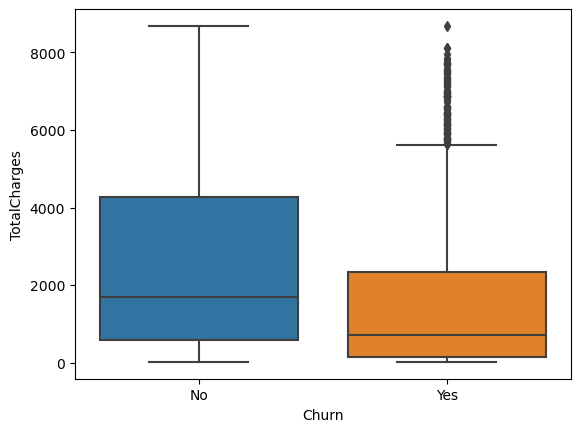

In [452]:
sns.boxplot(data=data,x='Churn',y='TotalCharges');

In [453]:
data.select_dtypes('float')

,MonthlyCharges,TotalCharges
0,29.85,29.85
1,56.95,1889.50
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65
...,...,...
7038,84.80,1990.50
7039,103.20,7362.90
7040,29.60,346.45
7041,74.40,306.60


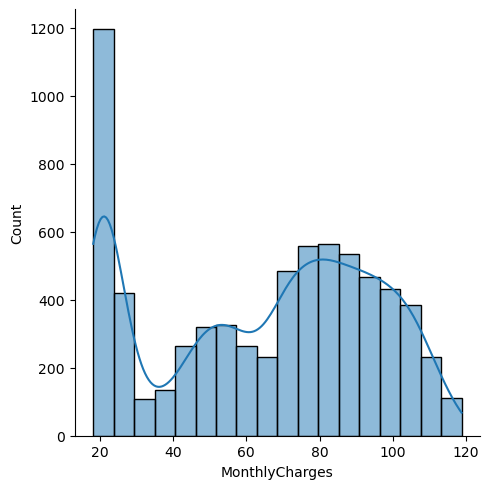

In [454]:
sns.displot(x=data['MonthlyCharges'],kde=True);

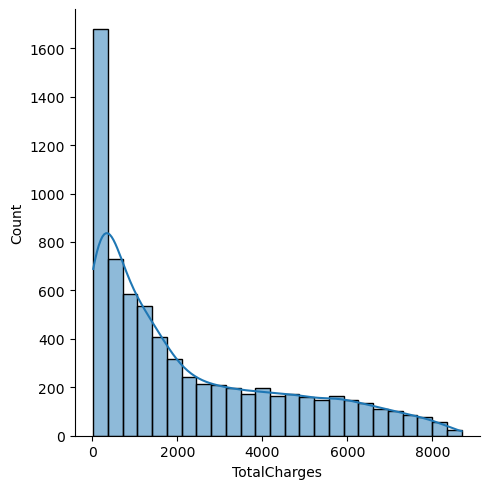

In [455]:
sns.displot(x=data['TotalCharges'],kde=True);

In [456]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [457]:

for i in col_cat:
    data[i]=data[i].astype('category')
    data[i]=data[i].cat.codes

In [458]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [459]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# X = data[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
#        'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
#        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
#        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
#        'MonthlyCharges']]
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif["features"] = X.columns
# vif

## Split data to train and test

In [460]:
train=data.drop('Churn',axis=1)
target=data['Churn'].values

In [461]:
print("train shape",train.shape,'\n',"target shape",target.shape)

train shape (7032, 19) 
 target shape (7032,)


In [462]:
x_train,x_test,y_train,y_test=train_test_split(train,target,test_size=.2,random_state=365)

## Scaled data

In [463]:
from sklearn.preprocessing import StandardScaler

In [464]:
scaled=StandardScaler()


In [465]:
x_train_scaled = scaled.fit_transform(x_train)
x_test_scaled = scaled.fit_transform(x_test)

## Logistic Regression

In [466]:
from sklearn.linear_model import LogisticRegression

In [467]:
reg = LogisticRegression(C=.5
                        )

In [468]:
reg.fit(x_train_scaled,y_train)

LogisticRegression(C=0.5)

In [469]:
y_pred_test = reg.predict(x_test_scaled)

In [470]:
reg.score(x_test_scaled,y_test)

0.8137882018479033

In [471]:
metrics.accuracy_score(y_test,y_pred_test)

0.8137882018479033

In [472]:
confusion_matrix(y_pred_test,y_test)

array([[926, 162],
       [100, 219]], dtype=int64)

In [473]:
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1088
           1       0.57      0.69      0.63       319

    accuracy                           0.81      1407
   macro avg       0.74      0.77      0.75      1407
weighted avg       0.83      0.81      0.82      1407

